PJM Interconnection LLC (PJM) is a regional transmission organization (RTO) in the United States. The hourly power consumption data comes from https://www.kaggle.com/robikscube/hourly-energy-consumption?select=PJME_hourly.csv and are in megawatts (MW).


In [150]:
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime as dt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
df = pd.read_csv('PJME_hourly.csv')
df.head()

In [ ]:
df.isnull().sum()

**IMPUTATION**

In [ ]:
# Forward-fill
df.ffill(inplace=True)
df.isnull().sum()

**SET DATETIME**

In [ ]:
df['Datetime']= pd.to_datetime(df['Datetime'])
df.head()

**FEATURE ENGINEERING** 

In [ ]:
df['hour'] = df['Datetime'].dt.hour
df['dayofweek'] = df['Datetime'].dt.dayofweek
df['quarter'] = df['Datetime'].dt.quarter
df['month'] = df['Datetime'].dt.month
df['year'] = df['Datetime'].dt.year
df['dayofyear'] = df['Datetime'].dt.dayofyear
df['dayofmonth'] = df['Datetime'].dt.day
df['weekofyear'] = df['Datetime'].dt.weekofyear

df['Datetime'] = df['Datetime'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d'))

df.head()

**SPLIT DATA - TRAIN & TEST**

In [157]:
train_set = df[df['Datetime'] < '2015-01-01']
test_set = df[df['Datetime'] > '2015-01-01']
train_set.set_index('Datetime',inplace=True)
test_set.set_index('Datetime',inplace=True)
train_set.head()
test_set.shape

(31416, 9)

In [ ]:
X_train = train_set.drop(['PJME_MW'], axis=1)
Y_train= train_set['PJME_MW']
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

X_test = test_set.drop(['PJME_MW'], axis=1)
Y_test = test_set['PJME_MW']
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


**MODEL TRAINING**

In [ ]:
best_xgb_model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
best_xgb_model.fit(X_train,Y_train)

In [160]:
y_pred = best_xgb_model.predict(X_test)
mean_squared_error(Y_test, y_pred)

17062980.64829043

In [162]:
#Mean absolute Percentage Error
import numpy as np
Y_test, y_pred = np.array(Y_test), np.array(y_pred)
np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100

9.703606961682798

**FEATURE IMPORTANCE**

[0.42556724 0.10469214 0.07618486 0.10933418 0.04395365 0.0946813
 0.01563636 0.12995021]


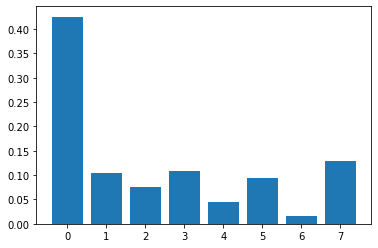

In [166]:
# feature importance
print(best_xgb_model.feature_importances_)
for col,score in zip(X_train.columns,model.feature_importances_):
    print(col,score)
# plot
plt.bar(range(len(best_xgb_model.feature_importances_)), best_xgb_model.feature_importances_)
plt.show()

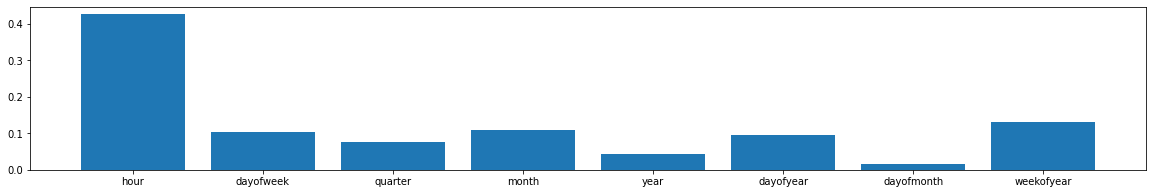

In [173]:
plt.rcParams["figure.figsize"] = (20,3)
# plot
plt.bar(best_xgb_model.get_booster().feature_names, best_xgb_model.feature_importances_)
plt.show()

To be done:

1. visualize the graph to check seasonality/trend
2. Check if stationary
3. Try other imputation method
4. Check the distribution
5. Check cross validation methods
6. Check different models
